<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Load-movies-&amp;-characters" data-toc-modified-id="Load-movies-&amp;-characters-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load movies &amp; characters</a></span></li><li><span><a href="#Load-Persona-CMU" data-toc-modified-id="Load-Persona-CMU-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load Persona CMU</a></span></li><li><span><a href="#Merge-data" data-toc-modified-id="Merge-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Merge data</a></span></li></ul></li><li><span><a href="#Persona-analysis" data-toc-modified-id="Persona-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Persona analysis</a></span><ul class="toc-item"><li><span><a href="#Genre" data-toc-modified-id="Genre-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Genre</a></span></li><li><span><a href="#Gender" data-toc-modified-id="Gender-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Gender</a></span></li><li><span><a href="#Temporal-factors" data-toc-modified-id="Temporal-factors-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Temporal factors</a></span></li></ul></li><li><span><a href="#Main-&amp;-side-characters" data-toc-modified-id="Main-&amp;-side-characters-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Main &amp; side characters</a></span><ul class="toc-item"><li><span><a href="#Load-graph-data" data-toc-modified-id="Load-graph-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Load graph data</a></span></li><li><span><a href="#Calculate-pagerank" data-toc-modified-id="Calculate-pagerank-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Calculate pagerank</a></span></li><li><span><a href="#Use-pagerank-to-define-the-main-&amp;-side-char" data-toc-modified-id="Use-pagerank-to-define-the-main-&amp;-side-char-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Use pagerank to define the main &amp; side char</a></span></li><li><span><a href="#Assign-main-&amp;-side-roles" data-toc-modified-id="Assign-main-&amp;-side-roles-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Assign main &amp; side roles</a></span></li><li><span><a href="#Merge" data-toc-modified-id="Merge-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Merge</a></span></li><li><span><a href="#Main-&amp;-side-analysis" data-toc-modified-id="Main-&amp;-side-analysis-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Main &amp; side analysis</a></span></li></ul></li></ul></div>

In [1]:
import ast
import re
#import spacy
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.ticker as ticker
from sklearn.preprocessing import MultiLabelBinarizer
from ipywidgets import interact, widgets

%matplotlib inline
plt.rcParams['font.family'] = 'Times New Roman'

# Data

## Load movies & characters

In [2]:
movies_path = "../Data/movies.csv" 
movies = pd.read_csv(movies_path)
movies['movie_release_year'] = movies['movie_release_date'].str.extract('(\d{4})', expand=False)
movies['movie_release_year'] = pd.to_numeric(movies['movie_release_year'], downcast='integer')
movies

,wikipedia_movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_genres_cleaned,movie_countries_cleaned,movie_languages_cleaned,movie_release_year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"['Thriller', 'Science Fiction', 'Horror', 'Adv...",United States of America,['English'],2001.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"['Mystery', 'Biographical film', 'Drama', 'Cri...",United States of America,['English'],2000.0
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"['Crime Fiction', 'Drama']",Norway,['Norwegian'],1988.0
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"['Thriller', 'Erotic thriller', 'Psychological...",United Kingdom,['English'],1987.0
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,['Drama'],Germany,['German'],1983.0
...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,['Drama'],United States of America,['English'],2011.0
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"['Biographical film', 'Drama', 'Documentary']","Ireland"", ""/m/07ssc"": ""United Kingdom",['English'],2011.0
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"['Satire', 'Comedy']",United States of America,['English'],1972.0
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"['Science Fiction', 'Japanese Movies', 'Advent...",Japan,['Japanese'],1992.0


In [3]:
characters_path = "../Data/characters.csv" 
characters = pd.read_csv(characters_path)
characters

,wikipedia_movie_id,freebase_movie_id,character_name,actor_dob,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age_release,freebase_char_map,freebase_char_id,freebase_actor_id
0,975900,/m/03vyhn,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450666,28308153,/m/0cp05t9,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450667,28308153,/m/0cp05t9,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


In [4]:
characters[characters['wikipedia_movie_id']==3217]

,wikipedia_movie_id,freebase_movie_id,character_name,actor_dob,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age_release,freebase_char_map,freebase_char_id,freebase_actor_id
239891,3217,/m/014hr,S-Mart Clerk,1965-12-14,M,1.87,NaN,Ted Raimi,26.0,/m/0hgcnkm,/m/0hgcnkq,/m/07qn0
239892,3217,/m/014hr,Fake shemp,1956,M,NaN,NaN,Ivan Raimi,36.0,/m/04hzm56,/m/089hc6,/m/0gmjf8
239893,3217,/m/014hr,Ash Williams,1958-06-22,M,1.85,NaN,Bruce Campbell,34.0,/m/0jtqtd,/m/06_krl,/m/01h8f
239894,3217,/m/014hr,Evil Ash,1958-06-22,M,1.85,NaN,Bruce Campbell,34.0,/m/0jtgxg0,/m/0jtgxg3,/m/01h8f
239895,3217,/m/014hr,Cowardly Warrior,1965-12-14,M,1.87,NaN,Ted Raimi,26.0,/m/04hzm5x,/m/0hgcnjh,/m/07qn0
239896,3217,/m/014hr,Linda,1964-01-27,F,1.68,/m/07hwkr,Bridget Fonda,28.0,/m/0jtqtq,/m/0h2hxrl,/m/01yd8v
239897,3217,/m/014hr,Sheila,1965-08-11,F,1.73,/m/06v41q,Embeth Davidtz,27.0,/m/0jtqtk,/m/0h36j9w,/m/034b7r
239898,3217,/m/014hr,Possessed Witch,1957-09-04,F,1.75,NaN,Patricia Tallman,35.0,/m/04hzm5r,/m/0hgcnl6,/m/045kf0
239899,3217,/m/014hr,Duke Henry the Red,1955,M,NaN,NaN,Richard Grove,37.0,/m/04hzm5d,/m/0h5tv3s,/m/04hzm5h
239900,3217,/m/014hr,Second Supportive Villager,1965-12-14,M,1.87,NaN,Ted Raimi,26.0,/m/0hgcnk7,/m/0hgcnkb,/m/07qn0


## Load Persona CMU

In [5]:
# Load Data
personas = pd.read_csv('../Data/Persona/25.100.lda.log.txt', sep='\t', header=None)
personas.columns = [
    'freebase_char_map',
    'wikipedia_movie_id',
    'movie_name',
    'char_name',
    'related_name',
    'token',
    'persona_code',
    'persona_distribution'
]

personas['persona_distribution'] = personas['persona_distribution'].apply(
    lambda x: np.array([float(num) for num in x.split()])
)

personas.head()

,freebase_char_map,wikipedia_movie_id,movie_name,char_name,related_name,token,persona_code,persona_distribution
0,e7,10000053,The Trap,she,her,5,36,"[0.01, 0.01, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0...."
1,e8,10000053,The Trap,she,her,5,49,"[0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,e12,10000053,The Trap,he,his,7,34,"[0.1, 0.0, 0.0, 0.02, 0.0, 0.0, 0.02, 0.0, 0.0..."
3,e19,10000053,The Trap,she,her,6,49,"[0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,e4,10000053,The Trap,Eve,Eve,11,31,"[0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


## Merge data

In [6]:
# personas + characters
personas_characters = personas.merge(characters, on=['freebase_char_map','wikipedia_movie_id'], how='inner')
personas_characters.head()

,freebase_char_map,wikipedia_movie_id,movie_name,char_name,related_name,token,persona_code,persona_distribution,freebase_movie_id,character_name,actor_dob,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age_release,freebase_char_id,freebase_actor_id
0,/m/02vcl4m,10004330,Halls of Montezuma,Pigeon Lane,Zelenko,5,5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.58, 0.21, 0.0, 0.0...",/m/02pzjvb,Pigeon Lane,1919-02-18,M,1.930,/m/0ffjvd,Jack Palance,30.0,/m/0h5cz0m,/m/02t_w8
1,/m/02tb80v,10004330,Halls of Montezuma,Lt. Col. Gilfillan,Gilfillan,3,47,"[0.0, 0.01, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0...",/m/02pzjvb,Lt. Col. Gilfillan,1917-06-18,M,1.854,NaN,Richard Boone,32.0,/m/0h4z9hs,/m/03c2b1
2,/m/02vc485,10016740,Mela,Roopa Singh,her,21,43,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",/m/02pzxpz,Roopa Singh,1974-12-29,F,1.630,/m/0dryh9k,Twinkle Khanna,25.0,/m/0h2t0j9,/m/04rs51
3,/m/02tbjr0,10016740,Mela,Kishan Pyare,Kishan and Roopa,14,18,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",/m/02pzxpz,Kishan Pyare,1965-03-14,M,1.680,/m/0dllcfn,Aamir Khan,34.0,/m/0gxp8dq,/m/015npr
4,/m/02vd85q,10016740,Mela,Shankar Shane,Shankar,10,18,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",/m/02pzxpz,Shankar Shane,1966-09,M,NaN,/m/0dryh9k,Faisal Khan,NaN,/m/0h74mpf,/m/07457s


In [7]:
personas_characters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38432 entries, 0 to 38431
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   freebase_char_map     38432 non-null  object 
 1   wikipedia_movie_id    38432 non-null  int64  
 2   movie_name            38432 non-null  object 
 3   char_name             38432 non-null  object 
 4   related_name          38432 non-null  object 
 5   token                 38432 non-null  int64  
 6   persona_code          38432 non-null  int64  
 7   persona_distribution  38432 non-null  object 
 8   freebase_movie_id     38432 non-null  object 
 9   character_name        38432 non-null  object 
 10  actor_dob             35416 non-null  object 
 11  actor_gender          37787 non-null  object 
 12  actor_height          27025 non-null  float64
 13  actor_ethnicity       19227 non-null  object 
 14  actor_name            38432 non-null  object 
 15  actor_age_release  

In [8]:
# personas + characters + movies
persona_char_movie = personas_characters.merge(movies,  on=[
    'movie_name','wikipedia_movie_id', 'freebase_movie_id'], how='inner')

persona_char_movie.head()

,freebase_char_map,wikipedia_movie_id,movie_name,char_name,related_name,token,persona_code,persona_distribution,freebase_movie_id,character_name,...,actor_age_release,freebase_char_id,freebase_actor_id,movie_release_date,movie_box_office_revenue,movie_runtime,movie_genres_cleaned,movie_countries_cleaned,movie_languages_cleaned,movie_release_year
0,/m/02vcl4m,10004330,Halls of Montezuma,Pigeon Lane,Zelenko,5,5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.58, 0.21, 0.0, 0.0...",/m/02pzjvb,Pigeon Lane,...,30.0,/m/0h5cz0m,/m/02t_w8,1950,2650000.0,113.0,"['Action/Adventure', 'Action', 'War film']",United States of America,['English'],1950.0
1,/m/02tb80v,10004330,Halls of Montezuma,Lt. Col. Gilfillan,Gilfillan,3,47,"[0.0, 0.01, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0...",/m/02pzjvb,Lt. Col. Gilfillan,...,32.0,/m/0h4z9hs,/m/03c2b1,1950,2650000.0,113.0,"['Action/Adventure', 'Action', 'War film']",United States of America,['English'],1950.0
2,/m/02vc485,10016740,Mela,Roopa Singh,her,21,43,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",/m/02pzxpz,Roopa Singh,...,25.0,/m/0h2t0j9,/m/04rs51,2000-01-07,NaN,NaN,"['Action', 'Drama']",India,['Hindi'],2000.0
3,/m/02tbjr0,10016740,Mela,Kishan Pyare,Kishan and Roopa,14,18,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",/m/02pzxpz,Kishan Pyare,...,34.0,/m/0gxp8dq,/m/015npr,2000-01-07,NaN,NaN,"['Action', 'Drama']",India,['Hindi'],2000.0
4,/m/02vd85q,10016740,Mela,Shankar Shane,Shankar,10,18,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",/m/02pzxpz,Shankar Shane,...,NaN,/m/0h74mpf,/m/07457s,2000-01-07,NaN,NaN,"['Action', 'Drama']",India,['Hindi'],2000.0


In [9]:
# persona_char_movie
unique_movie_ids_4 = persona_char_movie['wikipedia_movie_id'].nunique()
print("different 'Wikipedia movie ID':", unique_movie_ids_4)

different 'Wikipedia movie ID': 15156


In [10]:
# Save

# persona_char_movie.to_csv('../Data/Persona/persona_char_movie.csv', index=False)

# Persona analysis

In [11]:
if 'movie_genres_cleaned' in persona_char_movie.columns:
    persona_char_movie['movie_genres_cleaned'] = persona_char_movie['movie_genres_cleaned'].apply(lambda x: ast.literal_eval(x))
else:
    print("'movie_genres_cleaned' column does not exist or already contains real list data")

# Expand the list data in the 'movie_genres_cleaned' column into separate rows.
if 'movie_genres_cleaned' in persona_char_movie.columns:
    movie_genres_exploded = persona_char_movie.explode('movie_genres_cleaned')
    # print(movie_genres_exploded.head())
else:
    print("'movie_genres_cleaned' column does not exist or does not contain list data")

movie_genres_exploded.head()

,freebase_char_map,wikipedia_movie_id,movie_name,char_name,related_name,token,persona_code,persona_distribution,freebase_movie_id,character_name,...,actor_age_release,freebase_char_id,freebase_actor_id,movie_release_date,movie_box_office_revenue,movie_runtime,movie_genres_cleaned,movie_countries_cleaned,movie_languages_cleaned,movie_release_year
0,/m/02vcl4m,10004330,Halls of Montezuma,Pigeon Lane,Zelenko,5,5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.58, 0.21, 0.0, 0.0...",/m/02pzjvb,Pigeon Lane,...,30.0,/m/0h5cz0m,/m/02t_w8,1950,2650000.0,113.0,Action/Adventure,United States of America,['English'],1950.0
0,/m/02vcl4m,10004330,Halls of Montezuma,Pigeon Lane,Zelenko,5,5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.58, 0.21, 0.0, 0.0...",/m/02pzjvb,Pigeon Lane,...,30.0,/m/0h5cz0m,/m/02t_w8,1950,2650000.0,113.0,Action,United States of America,['English'],1950.0
0,/m/02vcl4m,10004330,Halls of Montezuma,Pigeon Lane,Zelenko,5,5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.58, 0.21, 0.0, 0.0...",/m/02pzjvb,Pigeon Lane,...,30.0,/m/0h5cz0m,/m/02t_w8,1950,2650000.0,113.0,War film,United States of America,['English'],1950.0
1,/m/02tb80v,10004330,Halls of Montezuma,Lt. Col. Gilfillan,Gilfillan,3,47,"[0.0, 0.01, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0...",/m/02pzjvb,Lt. Col. Gilfillan,...,32.0,/m/0h4z9hs,/m/03c2b1,1950,2650000.0,113.0,Action/Adventure,United States of America,['English'],1950.0
1,/m/02tb80v,10004330,Halls of Montezuma,Lt. Col. Gilfillan,Gilfillan,3,47,"[0.0, 0.01, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0...",/m/02pzjvb,Lt. Col. Gilfillan,...,32.0,/m/0h4z9hs,/m/03c2b1,1950,2650000.0,113.0,Action,United States of America,['English'],1950.0


In [12]:
unique_genres = movie_genres_exploded['movie_genres_cleaned'].unique()
print(unique_genres)


['Action/Adventure' 'Action' 'War film' 'Drama' 'Comedy-drama' 'Indie'
 'Biopic [feature]' 'Black-and-white' 'Romance Film' 'Albino bias'
 'Thriller' 'Comedy film' 'Mystery' 'Comedy' 'Romantic comedy'
 'Crime Fiction' 'Parody' 'Crime Comedy' 'Caper story' 'Action Comedy'
 'Political drama' 'Film adaptation' 'Crime Thriller' 'Teen' 'Short Film'
 'Science Fiction' 'Family Film' 'History' 'World cinema'
 "Children's/Family" 'Animal Picture' 'Family-Oriented Adventure'
 'Black comedy' 'Biography' 'Adventure' 'Family Drama' 'Period piece'
 'Coming of age' 'Biographical film' 'Suspense' 'Spy' 'Comedy of manners'
 'Propaganda film' 'Fantasy' 'Musical' 'Animation' 'Melodrama' 'Art film'
 'Romantic drama' 'Psychological thriller' 'Horror' 'Supernatural'
 'Absurdism' 'Existentialism' 'Cult' 'Satire' 'Airplanes and airports'
 'Courtroom Drama' 'Sports' 'Baseball' 'Docudrama' 'Slapstick'
 'Japanese Movies' 'Stop motion' 'Zombie Film' 'Western'
 'Fantasy Adventure' 'Costume drama' 'Sword and sorcer

## Genre

In [13]:
# Count the number of occurrences of each persona in different movie types
persona_genre_counts = (
    movie_genres_exploded
    .groupby(['persona_code', 'movie_genres_cleaned'])
    .size()
    .reset_index(name='count')
)

# Find the most common movie genres for each persona
top_genre_for_persona = (
    persona_genre_counts
    .groupby('persona_code')
    .apply(lambda x: x.loc[x['count'].idxmax()])
    .reset_index(drop=True)
)

print(top_genre_for_persona)

    persona_code movie_genres_cleaned  count
0              0             Thriller    700
1              1             Thriller    524
2              2           Short Film    290
3              3               Comedy   1467
4              4            Adventure     18
5              5               Action    921
6              6             Thriller    349
7              7                Drama      8
8              8                Drama     20
9              9                Drama    263
10            10                Drama   2948
11            11              Fantasy     48
12            12            Animation     36
13            13               Action    193
14            14                Drama     20
15            15               Comedy     94
16            16               Comedy    478
17            17               Horror   1391
18            18                Drama    863
19            19                Drama     54
20            20                Drama    230
21        

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


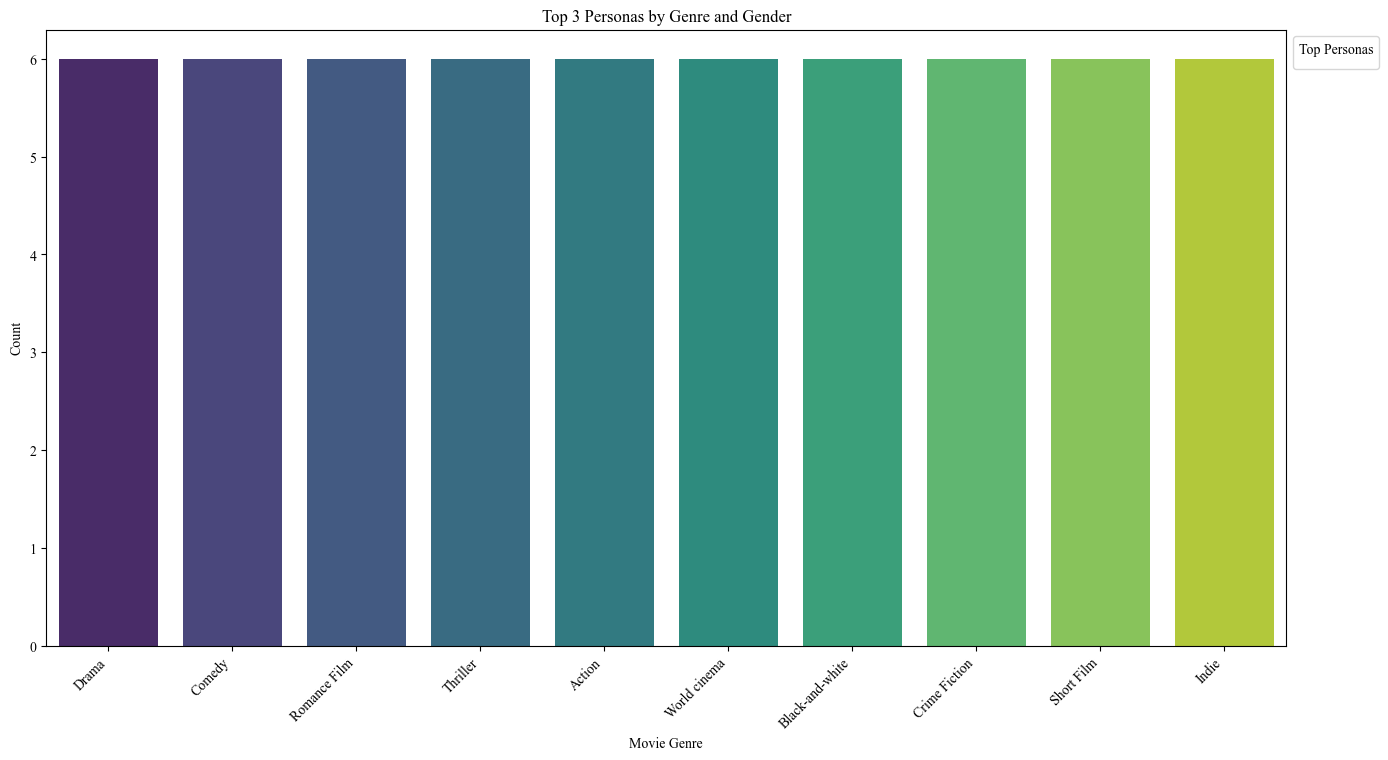

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming movie_genres_exploded is your DataFrame
# You may need to adjust column names if they differ in your actual DataFrame

# Predefined list of top genres
top_genres_list = ["Drama", "Comedy", "Romance Film", "Thriller", "Action", "World cinema", "Black-and-white", "Crime Fiction", "Short Film", "Indie"]

# Filter the DataFrame for the top genres
df_top_genres = movie_genres_exploded[movie_genres_exploded['movie_genres_cleaned'].isin(top_genres_list)]

# Function to find the top personas for each combination of genre, character type, and actor gender
def top_personas(group, top_n=3):
    return group['persona_code'].value_counts().nlargest(top_n).index.tolist()

# Group by genre, character type, and actor gender, then apply the function
result_top_personas = df_top_genres.groupby(['movie_genres_cleaned', 'actor_gender']).apply(top_personas).reset_index(name='top_personas')

# Expand the list of top personas into separate columns
result_top_personas_expanded = pd.DataFrame(result_top_personas['top_personas'].tolist(), index=result_top_personas.index)

# Concatenate the expanded DataFrame with the original result
result_top_personas_final = pd.concat([result_top_personas[['movie_genres_cleaned', 'actor_gender']], result_top_personas_expanded], axis=1)

# Create a grouped bar chart
plt.figure(figsize=(16, 8))
sns.countplot(x='movie_genres_cleaned', data=result_top_personas_final.melt(id_vars=['movie_genres_cleaned', 'actor_gender']), palette='viridis', order=top_genres_list)
plt.title('Top 3 Personas by Genre and Gender')
plt.xlabel('Movie Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Top Personas', bbox_to_anchor=(1, 1))
plt.show()


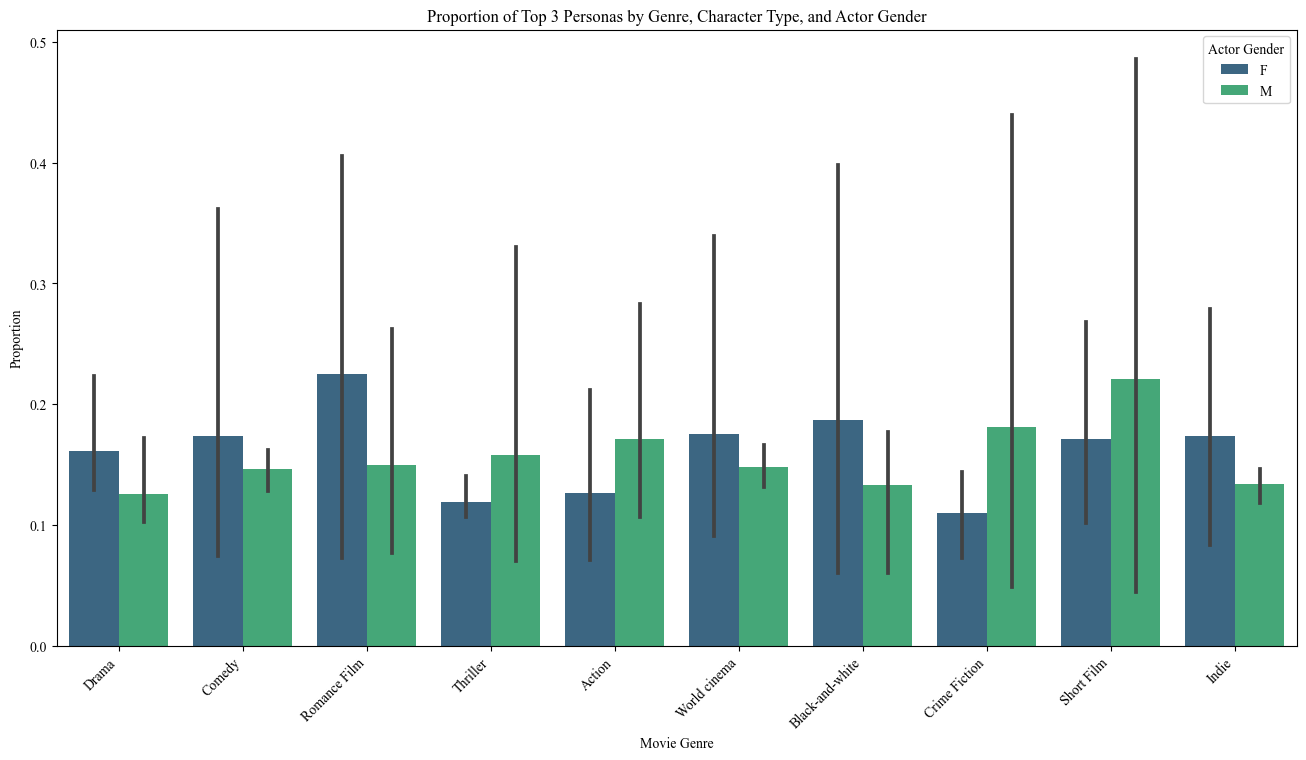

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming movie_genres_exploded is your DataFrame
# You may need to adjust column names if they differ in your actual DataFrame

# Predefined list of top genres
top_genres_list = ["Drama", "Comedy", "Romance Film", "Thriller", "Action", "World cinema", "Black-and-white", "Crime Fiction", "Short Film", "Indie"]

# Filter the DataFrame for the top genres
df_top_genres = movie_genres_exploded[movie_genres_exploded['movie_genres_cleaned'].isin(top_genres_list)]

# Function to find the top personas for each combination of genre, character type, and actor gender
def top_personas(group, top_n=3):
    return group['persona_code'].value_counts().nlargest(top_n) / group.shape[0]

# Group by genre, character type, and actor gender, then apply the function
result_top_personas = df_top_genres.groupby(['movie_genres_cleaned', 'actor_gender']).apply(top_personas).reset_index(name='proportion_top_personas')

# Create a grouped bar chart
plt.figure(figsize=(16, 8))
sns.barplot(x='movie_genres_cleaned', y='proportion_top_personas', hue='actor_gender', data=result_top_personas, palette='viridis', order=top_genres_list)
plt.title('Proportion of Top 3 Personas by Genre, Character Type, and Actor Gender')
plt.xlabel('Movie Genre')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Actor Gender', bbox_to_anchor=(1, 1))
plt.show()


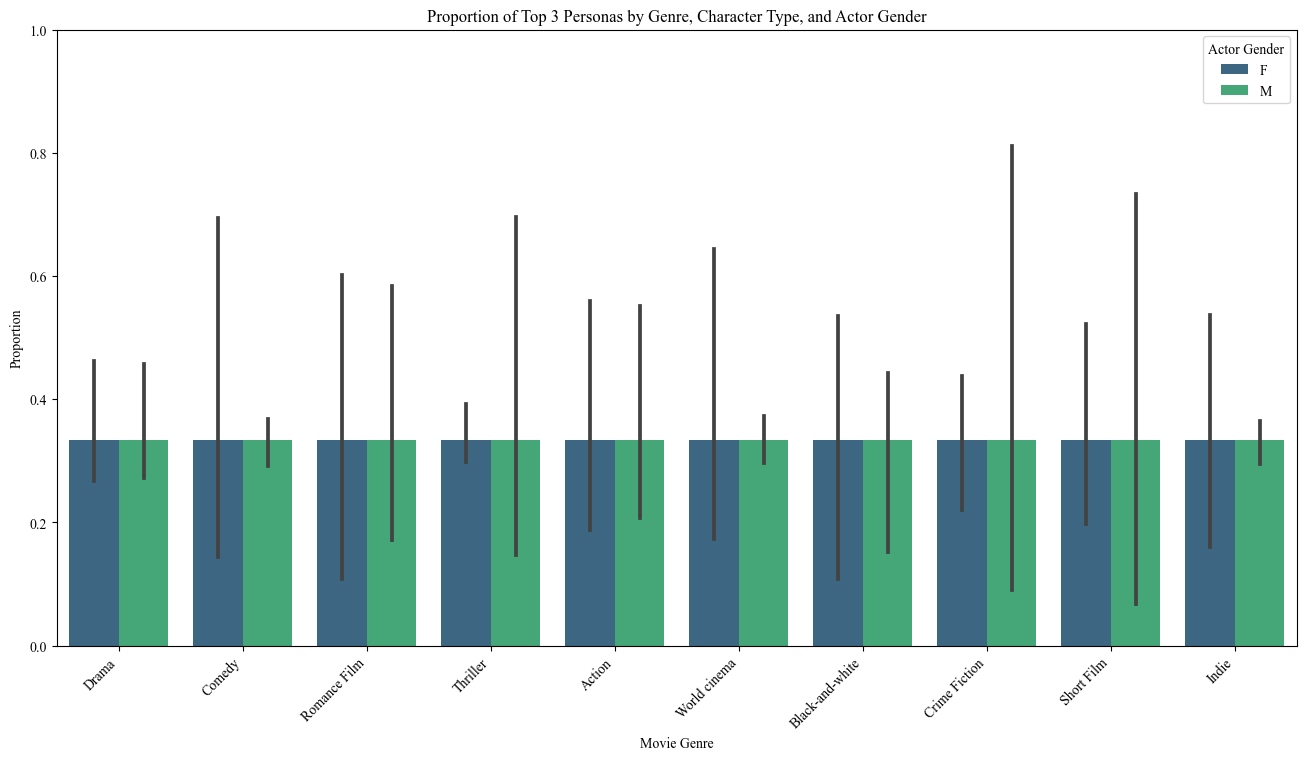

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming movie_genres_exploded is your DataFrame
# You may need to adjust column names if they differ in your actual DataFrame

# Predefined list of top genres
top_genres_list = ["Drama", "Comedy", "Romance Film", "Thriller", "Action", "World cinema", "Black-and-white", "Crime Fiction", "Short Film", "Indie"]

# Filter the DataFrame for the top genres
df_top_genres = movie_genres_exploded[movie_genres_exploded['movie_genres_cleaned'].isin(top_genres_list)]

# Function to find the top personas for each combination of genre, character type, and actor gender
def top_personas(group, top_n=3):
    top_persona_counts = group['persona_code'].value_counts().nlargest(top_n)
    total_count = top_persona_counts.sum()
    return top_persona_counts / total_count

# Group by genre, character type, and actor gender, then apply the function
result_top_personas = df_top_genres.groupby(['movie_genres_cleaned', 'actor_gender']).apply(top_personas).reset_index(name='proportion_top_personas')

# Create a stacked bar chart
plt.figure(figsize=(16, 8))
sns.barplot(x='movie_genres_cleaned', y='proportion_top_personas', hue='actor_gender', data=result_top_personas, palette='viridis', order=top_genres_list)
plt.title('Proportion of Top 3 Personas by Genre, Character Type, and Actor Gender')
plt.xlabel('Movie Genre')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Actor Gender', bbox_to_anchor=(1, 1))
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.show()


In [30]:
import pandas as pd
import plotly.subplots as sp
import plotly.graph_objects as go

# Assuming movie_genres_exploded is your DataFrame
# You may need to adjust column names if they differ in your actual DataFrame

# Predefined list of top genres
top_genres_list = ["Drama", "Comedy", "Romance Film", "Thriller", "Action", "World cinema", "Black-and-white", "Crime Fiction", "Short Film", "Indie"]

# Filter the DataFrame for the top genres
df_top_genres = movie_genres_exploded[movie_genres_exploded['movie_genres_cleaned'].isin(top_genres_list)]

# Function to get the top 3 personas for each combination of genre and gender
def top_personas(group, top_n=3):
    return group['persona_code'].value_counts().nlargest(top_n)

# Group by genre and gender, then apply the function
result_top_personas = df_top_genres.groupby(['movie_genres_cleaned', 'actor_gender']).apply(top_personas).reset_index(name='top_personas')

# Calculate the total count for each genre and gender
result_top_personas['total_count'] = result_top_personas.groupby(['movie_genres_cleaned', 'actor_gender'])['top_personas'].transform('sum')

# Calculate the percentage for each persona
result_top_personas['percentage'] = result_top_personas['top_personas'] / result_top_personas['total_count'] * 100

# Display the updated DataFrame
#print(result_top_personas)

# Calculate the total count for each genre and gender
result_top_personas['total_count'] = result_top_personas.groupby(['movie_genres_cleaned', 'actor_gender'])['top_personas'].transform('sum')

# Calculate the percentage for each persona
result_top_personas['percentage'] = result_top_personas['top_personas'] / result_top_personas['total_count']

# Display the updated DataFrame
#print(result_top_personas)

# Rename the column
result_top_personas = result_top_personas.rename(columns={'level_2': 'persona_code'})

# Filter data for male and create an interactive stacked bar graph
fig_male = px.bar(result_top_personas[result_top_personas['actor_gender'] == 'M'], 
                  x='movie_genres_cleaned', 
                  y='percentage', 
                  color='persona_code',
                  category_orders={'persona_code': ['1', '2', '3']},
                  labels={'percentage': 'Percentage'},
                  title='Percentage of Top 3 Personas by Genre and Persona Code (Male)',
                  height=500,
                  width=800)

# Update axis labels and facet labels for male graph
fig_male.update_layout(xaxis_title='Movie Genre',
                       yaxis_title='Percentage',
                       xaxis={'categoryorder': 'array', 'categoryarray': top_genres_list},
                       yaxis_tickformat='%')

# Filter data for female and create an interactive stacked bar graph
fig_female = px.bar(result_top_personas[result_top_personas['actor_gender'] == 'F'], 
                    x='movie_genres_cleaned', 
                    y='percentage', 
                    color='persona_code',
                    category_orders={'persona_code': ['1', '2', '3']},
                    labels={'percentage': 'Percentage'},
                    title='Percentage of Top 3 Personas by Genre and Persona Code (Female)',
                    height=500,
                    width=800)

# Update axis labels and facet labels for female graph
fig_female.update_layout(xaxis_title='Movie Genre',
                         yaxis_title='Percentage',
                         xaxis={'categoryorder': 'array', 'categoryarray': top_genres_list},
                         yaxis_tickformat='%')

# Show the interactive plots
fig_male.show()
fig_female.show()

# Save the interactive plots as HTML files
fig_male.write_html("../generated/html/male_genre_persona.html")
fig_female.write_html("../generated/html/female_genre_persona.html")

In [18]:

# Melt the DataFrame for plotting
result_top_personas_melted = result_top_personas_pivot_percentage.melt(id_vars=['movie_genres_cleaned', 'actor_gender'], var_name='Persona', value_name='Percentage')

# Create a stacked bar chart
plt.figure(figsize=(16, 8))
sns.barplot(x='movie_genres_cleaned', y='Percentage', hue='actor_gender', data=result_top_personas_melted, palette='viridis', order=top_genres_list)
plt.title('Percentage of Top 3 Personas by Genre and Actor Gender')
plt.xlabel('Movie Genre')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Actor Gender', bbox_to_anchor=(1, 1))
plt.show()


NameError: name 'result_top_personas_pivot_percentage' is not defined

In [ ]:
# Interactive Bar Chart of Persona and Movie Genres Count

# Create an interactive histogram
fig = px.bar(persona_genre_counts, x='persona_code', y='count', color='movie_genres_cleaned',
             title='Interactive Bar Chart of Persona and Movie Genres Count')

# Sort by the number of occurrences of persona
fig.update_layout(
    xaxis_title='Persona',
    yaxis_title='Count',
    xaxis={'categoryorder': 'total descending'},
    height=600
)

fig.show()

In [ ]:
# Show Persona distribution
persona_fig = px.bar(persona_genre_counts, x='persona_code', y='count', color='movie_genres_cleaned',
                     title='Interactive Bar Chart of Persona and Movie Genres Count')
persona_fig.update_layout(
    xaxis_title='Persona',
    yaxis_title='Count',
    xaxis={'categoryorder': 'total descending'},
    height=600
)

# Create the function 
def show_genre_distribution(selected_persona):
    filtered_data = persona_genre_counts[persona_genre_counts['persona_code'] == selected_persona]

    fig = px.bar(filtered_data, x='movie_genres_cleaned', y='count',
                 title=f'Distribution of Genres for Persona {selected_persona}')
    fig.update_layout(xaxis_title='Movie Genres', yaxis_title='Count')
    fig.show()

persona_dropdown = widgets.Dropdown(
    options=sorted(persona_genre_counts['persona_code'].unique()),
    description='Select Persona:', 
    style={'description_width': 'initial', 'width': '300px'}
)

interact(show_genre_distribution, selected_persona=persona_dropdown)

In [ ]:
import plotly.express as px
from ipywidgets import interact, widgets
import pandas as pd

# Create the function to show genre distribution for a selected persona
def show_genre_distribution(selected_persona):
    filtered_data = persona_genre_counts[persona_genre_counts['persona_code'] == selected_persona]

    fig = px.bar(filtered_data, x='movie_genres_cleaned', y='count',
                 title=f'Distribution of Genres for Persona {selected_persona}',
                 color='movie_genres_cleaned',
                 labels={'movie_genres_cleaned': 'Movie Genres', 'count': 'Count'},
                 category_orders={'movie_genres_cleaned': filtered_data['movie_genres_cleaned'].tolist()}
                )
    fig.update_layout(xaxis_title='Movie Genres', yaxis_title='Count')

    fig.show()

# Dropdown widget to select Persona
persona_dropdown = widgets.Dropdown(
    options=sorted(persona_genre_counts['persona_code'].unique()),
    description='Select Persona:', 
    style={'description_width': 'initial', 'width': '300px'}
)

# Display the interactive chart
interact(show_genre_distribution, selected_persona=persona_dropdown)


In [ ]:
import plotly.express as px
from ipywidgets import interact, widgets
import pandas as pd

# Assuming you have the 'persona_genre_counts' DataFrame

# Create the function to show genre distribution for a selected persona
def show_genre_distribution(selected_persona):
    filtered_data = persona_genre_counts[persona_genre_counts['persona_code'] == selected_persona]

    fig = px.bar(filtered_data, x='movie_genres_cleaned', y='count',
                 title=f'Distribution of Genres for Persona {selected_persona}',
                 color='movie_genres_cleaned',
                 labels={'movie_genres_cleaned': 'Movie Genres', 'count': 'Count'},
                 category_orders={'movie_genres_cleaned': filtered_data['movie_genres_cleaned'].tolist()}
                )
    fig.update_layout(xaxis_title='Movie Genres', yaxis_title='Count')

    # Highlight top 10 bars with annotations
    top_10 = filtered_data.nlargest(10, 'count')
    for index, row in top_10.iterrows():
        fig.add_annotation(x=row['movie_genres_cleaned'], y=row['count'],
                           text=row['count'], showarrow=True, arrowhead=1)

    fig.show()

# Dropdown widget to select Persona
persona_dropdown = widgets.Dropdown(
    options=sorted(persona_genre_counts['persona_code'].unique()),
    description='Select Persona:', 
    style={'description_width': 'initial', 'width': '300px'}
)

# Display the interactive chart
interact(show_genre_distribution, selected_persona=persona_dropdown)


In [ ]:
# Visualize the favorite movie genres for each persona
plt.figure(figsize=(12, 8))
sns.barplot(data=top_genre_for_persona, x='persona_code', y='count', hue='movie_genres_cleaned', dodge=False)
plt.title('Top Movie Genre for Each Persona')
plt.xlabel('Persona')
plt.ylabel('Count')
plt.legend(title='Movie Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Gender

## Temporal factors

# Main & side characters

## Load graph data

## Calculate pagerank

Create a directed graph for each movie and calculate three centrality measures for characters.

## Use pagerank to define the main & side char

## Assign main & side roles

Calculate the difference in PageRank values to identify the maximum difference, which serves as the boundary between main and side characters.

## Merge

## Main & side analysis